In [1]:
%matplotlib inline

In [2]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data

In [15]:
f = np.loadtxt('../Phenology_calibration/root_test_ET_obs/surf_prop.dat',delimiter=',')
time = f[:,0]/86400
snow_depth = f[:,1]
ET = f[:,2]
Evap_grnd = f[:,3]
Evap_snow = f[:,4]
Sublim_snow = f[:,5]
Qe = f[:,6]
Qw = f[:,7]

f_precp = np.loadtxt('../Phenology_calibration/root_test_w_precip/surf_prop.dat',delimiter=',')
time_precp = f_precp[:,0]/86400
snow_depth_precp = f_precp[:,1]
ET_precp = f_precp[:,2]
Evap_grnd_precp = f_precp[:,3]
Evap_snow_precp = f_precp[:,4]
Sublim_snow_precp = f_precp[:,5]
Qe_precp = f_precp[:,6]
Qw_precp = f_precp[:,7]

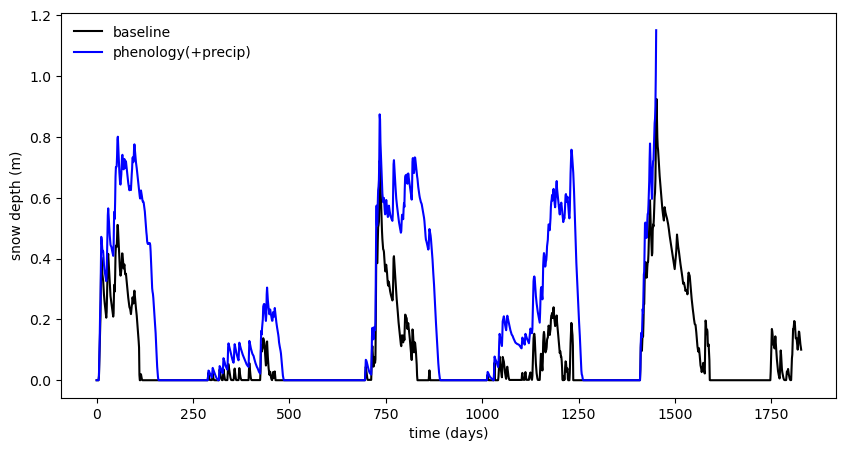

In [46]:
ss_base = np.loadtxt("../Albedo_runs/Baseline_heat_test/snow_status.dat",delimiter=",")

time = ss_base[:,0]/86400
sd_base = ss_base[:,1]

fig0 = plt.figure(1111,figsize=(10,5))
plt.plot(time,sd_base,color='k', label="baseline")
plt.plot(time_precp,snow_depth_precp,color='b', label="phenology(+precip)")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (days)")
plt.ylabel("snow depth (m)")
plt.show()

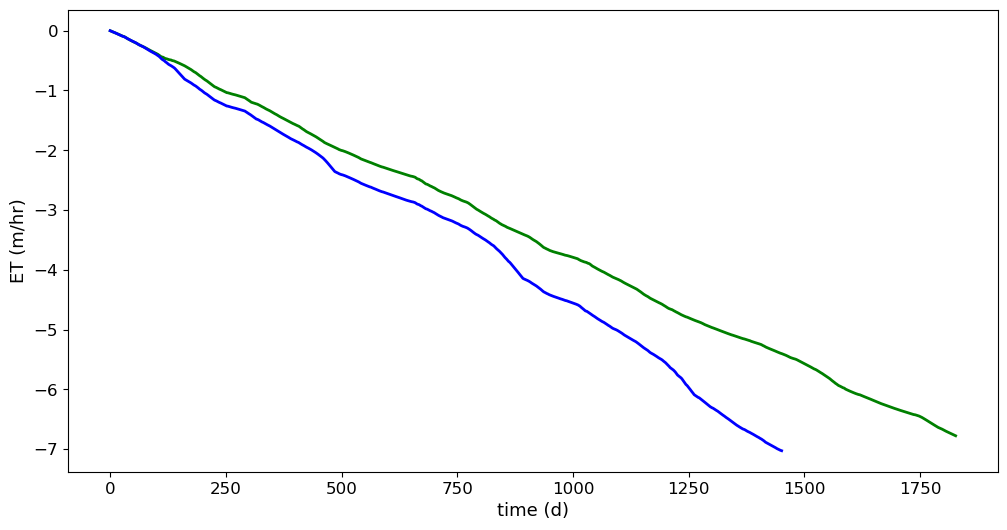

In [32]:
plt.figure(1,figsize=(12,6))
plt.plot(time,ET,color='g',lw=2)
plt.plot(time_precp,ET_precp,color='b',lw=2)
plt.xlabel("time (d)",fontsize=13)
plt.ylabel("ET (m/hr)",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

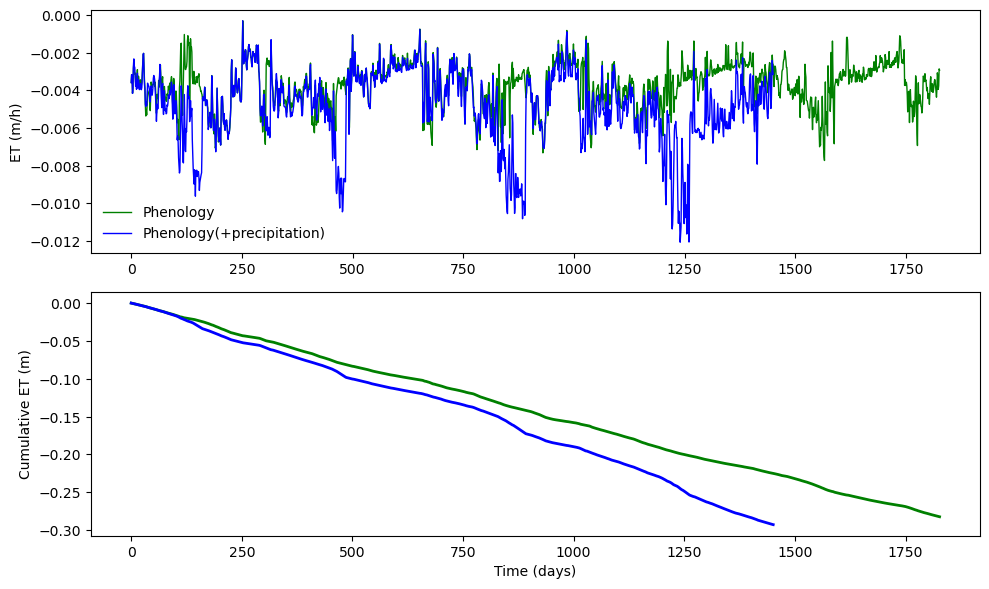

In [38]:
# Calculate differential ET (rate of change)
dt = np.diff(time)  # time differences
dET = np.diff(ET)   # ET differences
ET_rate = dET / dt  # ET rate (units: [ET units]/[time units])

# Time points for the rate (midpoints or use starting points)
time_rate = time[:-1]  # or time[1:], or (time[:-1] + time[1:])/2 for midpoints

# Calculate differential ET (rate of change)
dt_precp = np.diff(time_precp)  # time differences
dET_precp = np.diff(ET_precp)   # ET differences
ET_rate_precp = dET_precp / dt_precp  # ET rate (units: [ET units]/[time units])

# Time points for the rate (midpoints or use starting points)
time_rate_precp = time_precp[:-1]  # or time[1:], or (time[:-1] + time[1:])/2 for midpoints

# Plot
plt.figure(4,figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(time, ET/24., color='g', lw=2)
plt.plot(time_precp, ET_precp/24., color='b', lw=2)
plt.ylabel('Cumulative ET (m)')
plt.xlabel('Time (days)')
#plt.title('Cumulative ET')

plt.subplot(2, 1, 1)
plt.plot(time_rate, ET_rate, color='g', lw=1, label='Phenology')
plt.plot(time_rate_precp, ET_rate_precp, color='b', lw=1,label='Phenology(+precipitation)')
plt.ylabel('ET (m/h)')
plt.legend(frameon=False)
#plt.xlabel('Time (days)')
plt.tight_layout()
plt.show()

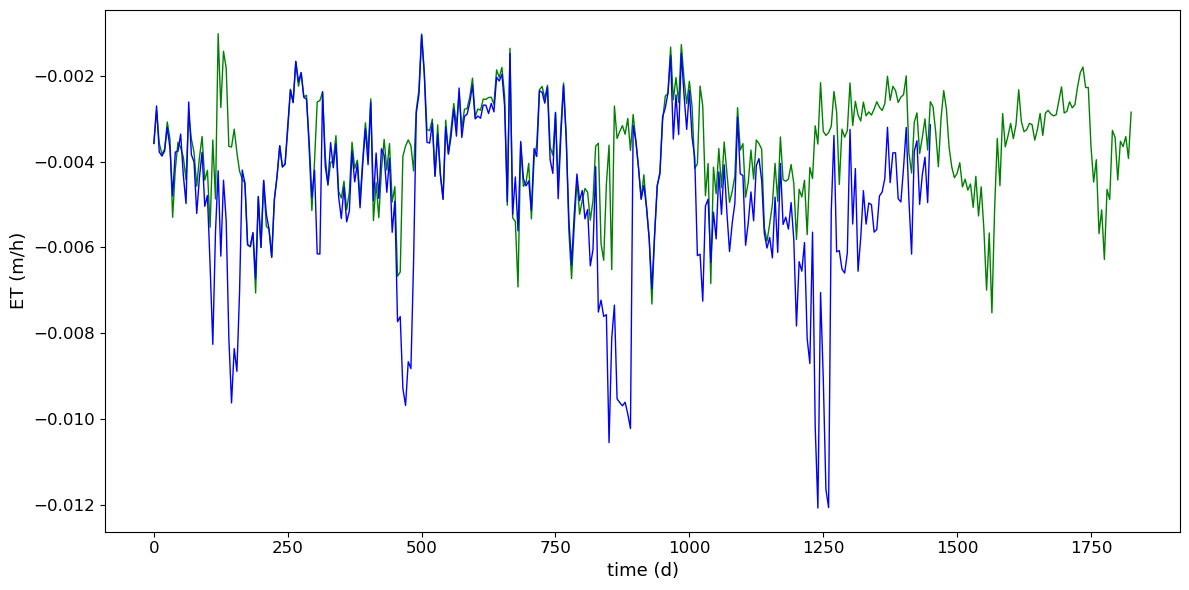

In [39]:
plt.figure(5,figsize=(12,6))
#plt.plot(time_rate[::5], ET_rate[::5], color='g',alpha=0.8, lw=1)
plt.plot(time_rate[::5], ET_rate[::5], color='g', lw=1)
plt.plot(time_rate_precp[::5], ET_rate_precp[::5], color='b', lw=1)
plt.ylabel('ET (m/h)',fontsize=13)
plt.xlabel('time (d)', fontsize=13)
#plt.title('Differential ET (Rate)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

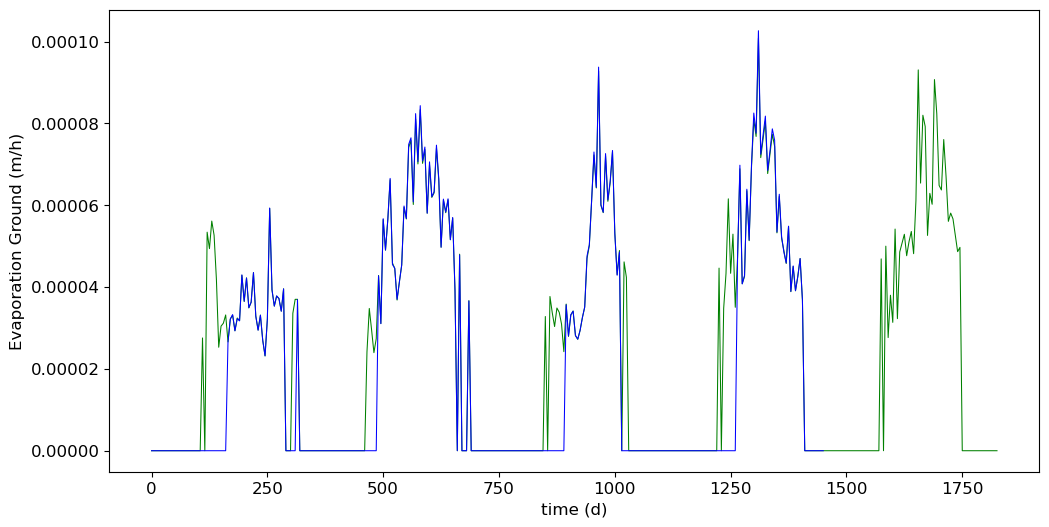

In [40]:
plt.figure(2,figsize=(12,6))
plt.plot(time[::5],Evap_grnd[::5],color="g",lw=0.75)
plt.plot(time_precip[::5],Evap_grnd_precp[::5],color="b",lw=0.75)
plt.xlabel("time (d)",fontsize=12)
plt.ylabel("Evaporation Ground (m/h)",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

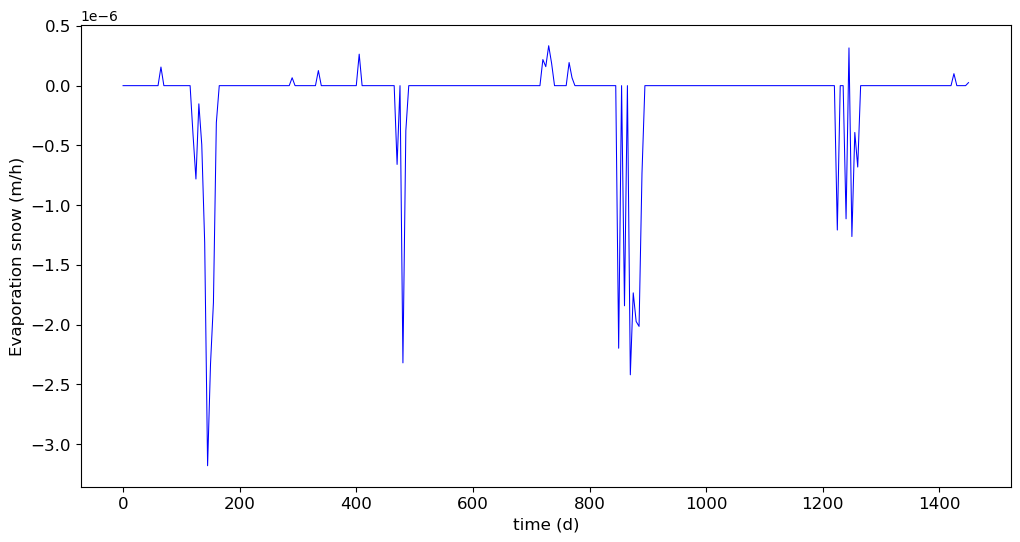

In [41]:
plt.figure(2,figsize=(12,6))
#plt.plot(time[::5],Evap_snow[::5],color="g",lw=0.75)
plt.plot(time_precip[::5],Evap_snow_precp[::5],color="b",lw=0.75)
plt.xlabel("time (d)",fontsize=12)
plt.ylabel("Evaporation snow (m/h)",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

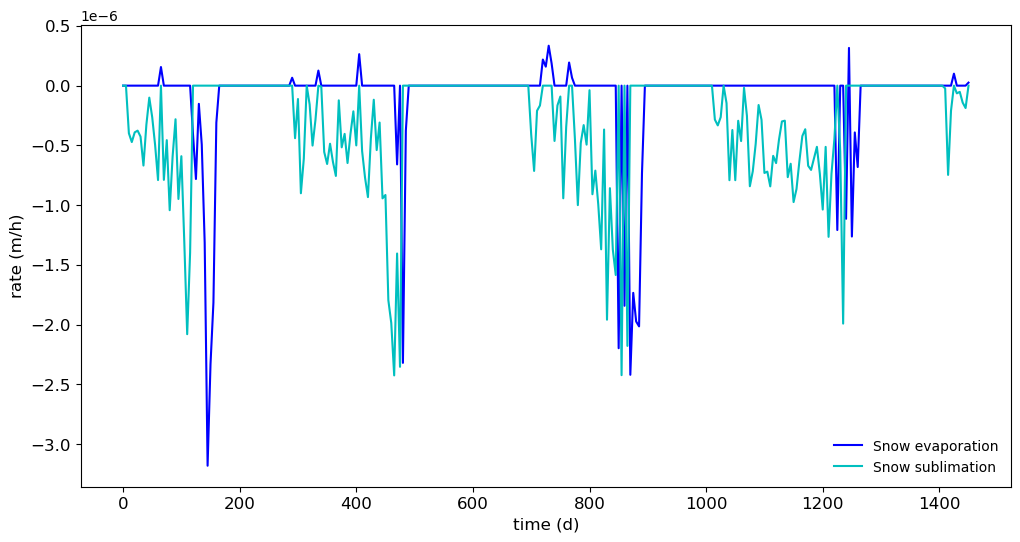

In [52]:
plt.figure(6,figsize=(12,6))
#plt.plot(time[::5],Evap_grnd[::5],color="g",lw=0.75)
plt.plot(time_precip[::5],Evap_snow_precp[::5],color="b",label='Snow evaporation')
plt.plot(time_precip[::5],Sublim_snow_precp[::5],color="c",label='Snow sublimation')
plt.xlabel("time (d)",fontsize=12)
plt.ylabel("rate (m/h)",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=False)
plt.show()

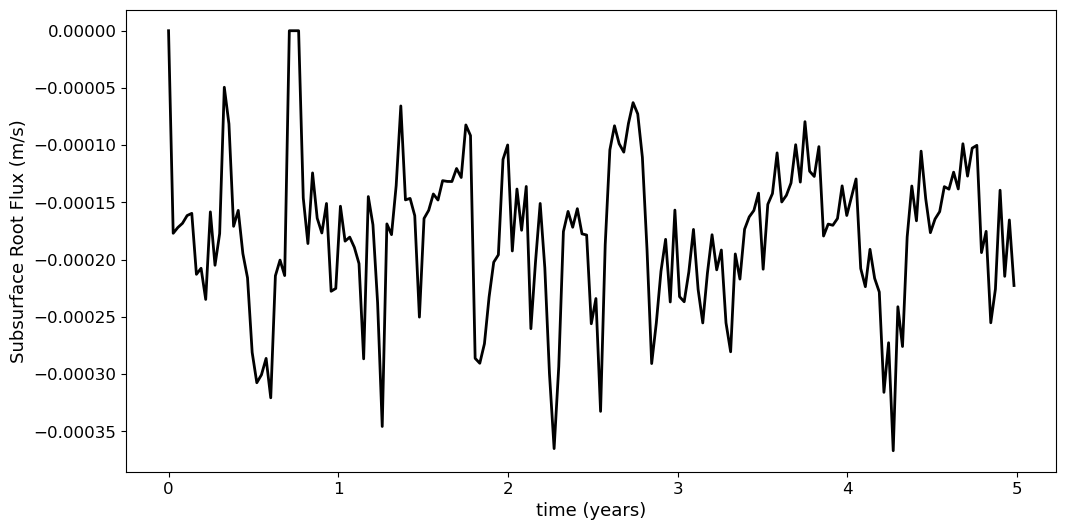

In [8]:
vis = ats_xdmf.VisFile("../Phenology_calibration/root_test_ET_obs/")
vis_surf = ats_xdmf.VisFile("../Phenology_calibration/root_test_ET_obs/", domain="surface")

root_flux = vis.getArray('subsurface_ecosim_water_source')

total_flux = np.sum(root_flux,axis=1)
time = vis.times

plt.figure(figsize=(12,6))
plt.plot(time,total_flux,color='k',lw=2)
plt.xlabel("time (years)",fontsize=13)
plt.ylabel("Subsurface Root Flux (m/s)",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

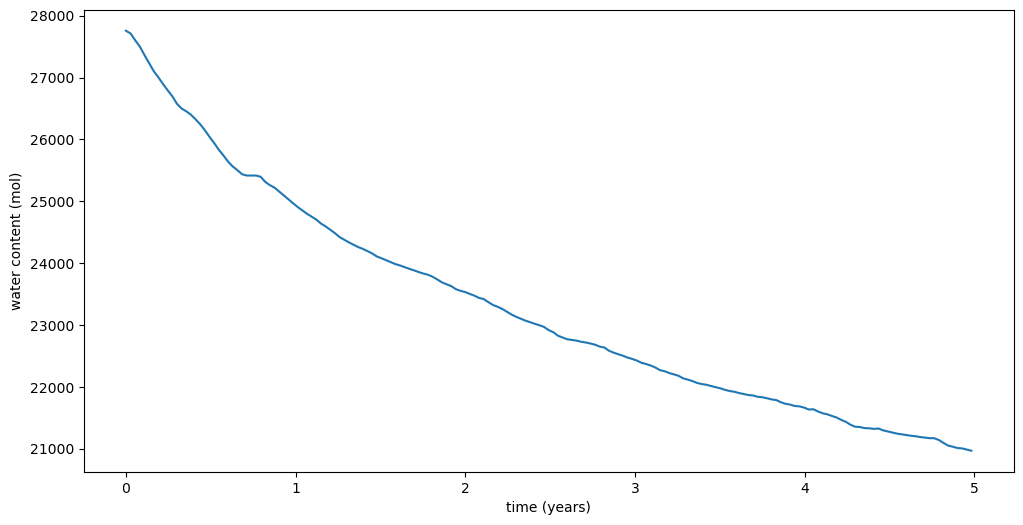

In [9]:
WC = vis.getArray('water_content')
WC_top = WC[:,-1]

plt.figure(2,figsize=(12,6))
plt.plot(time,WC_top)
plt.xlabel("time (years)")
plt.ylabel("water content (mol)")
plt.show()

In [8]:
saturation_l = vis.getArray('saturation_liquid')

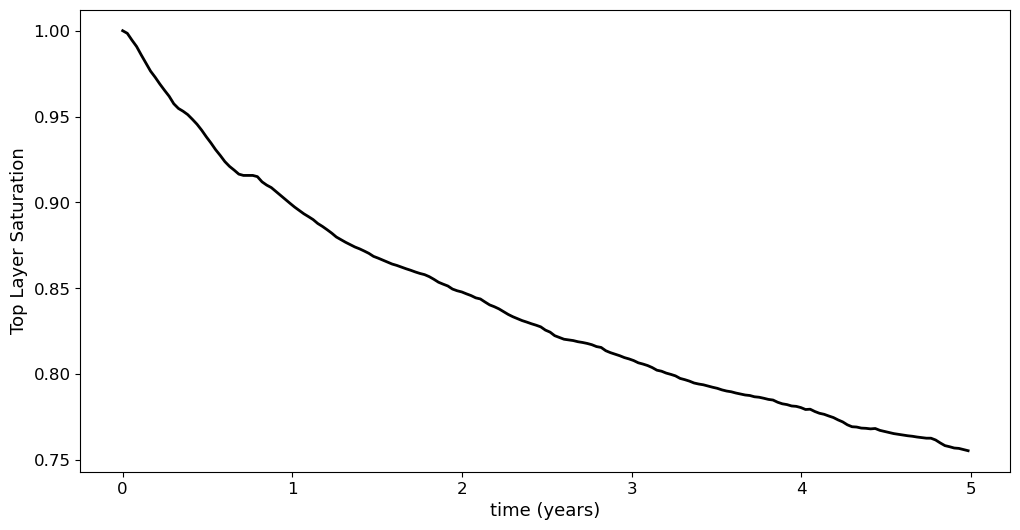

In [14]:
saturation_l = vis.getArray('saturation_liquid')
plt.figure(figsize=(12,6))
plt.plot(time,saturation_l[:,-1], lw=2, color='k')
plt.xlabel("time (years)",fontsize=13)
plt.ylabel("Top Layer Saturation",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()